# Drivers of Churn

Markdown Color Key:

<font color='red'>drivers</font>


# Planning

___

## Primary Goals: 
- Determine key drivers of churn from Telco Dataset. 
- Determine the most viable ML model and accurately predict churn with it.

## Imports

In [1]:
# import everything I need from various other notebooks and python files for finalizing project
import pandas as pd, numpy as np
import acquire as acq, prepare as prep
import seaborn as sns, matplotlib.pyplot as plt
import os
from acquire import get_connection, get_telco_data
from prepare import prep_telco, dropped
from sklearn.model_selection import train_test_split
from modeling import dt_comp, rf_comp, knn_comp, lr_comp, model_comp
from evaluation import driv_viz, chi_sqr_con, chi_sqr_int, chi_sqr_mon, cr_comp
# I know you said not to do this Tasha but those warnings were too annoying not to
import warnings
warnings.filterwarnings("ignore")

___

# Acquisition

In [2]:
# using a function, establish a connection to MySQLWorkbench and get me the telco dataset
telco = get_telco_data()

- Gathered Telco Dataset from SQL
- Before cleaning, the dataset had a size of 7043 rows by 24 columns
- Every row present is indicative of all our customers, churned or not
- The columns are features for each of those customers

___

# Preparation

In [3]:
# call the function to do all the cleaning for me
telco = prep_telco(telco)
# do these additional cleaning steps
telco['target'] = (telco['churn'] == 'Yes')
telco = telco.drop(columns='churn')
# split that new cleaned data into a tain, validate, and test set
train_validate, test = train_test_split(telco, test_size=0.2, random_state=117, stratify=telco['target'])
train, validate = train_test_split(train_validate, test_size=0.3, random_state=117, stratify=train_validate['target'])

## Steps Taken to Clean Dataset:
- Dropped unnecessary columns
- Filled in null values
- Determined if columns were appropriate data types 
- Encoded and/or created dummy variables where needed
- Renamed columns for visual clarity
- Split cleaned data into train, validate, test (~55/25/20), stratifying on 'target' ('churn')

## Let's look at a small view of the training data so far

In [4]:
# show me the top five rown of my training data
train.head(5)

,senior_citizen,tenure,monthly_charges,total_charges,gender_,has_partner,has_dependents,has_phone_service,has_multiple_lines,contract,internet_service,has_automatic_payment,has_amenities,has_internet_service,target
4993,0,56,59.80,3457.45,1,1,1,1,1,2,1,1,0,1,False
190,0,5,96.10,453.40,1,0,0,1,1,0,2,0,0,1,True
5071,1,16,54.55,825.10,1,1,0,1,1,0,1,1,0,1,False
461,0,63,71.90,4479.20,1,0,0,1,2,2,1,1,1,1,False
2383,1,3,74.60,239.05,0,1,0,1,1,0,2,1,0,1,False


## Data Dictionary

| Feature | Definition | 
| :- | :- |
| Senior Citizen | If a customer is a senior citizen, 0 = No, 1 = Yes |
| Tenure | The amount of months a customer has been with or is currently with company |
| <font color='red'>Monthly Charges</font> | Amount a customer is charged monthly |
| Total Charges | Cumulative amount a customer has paid |
| Gender | If a customer is male or female, 0 = Female, 1 = Male |
| Has Partner | If a customer has a partner, 0 = No, 1 = Yes |
| Has Dependents | If a customer has dependents, 0 = No, 1 = Yes |
| Has Multiple Lines | If a customer has multiple lines, 0 = No, 1 = Yes |
| <font color='red'>Contract</font> | Type of contract customer has, 0 = Month-to-month, 1 = One year, 2 = Two year|
| Internet Service | Type of Internet Service customer has, 0 = No internet service, 1 = DSL, 2 = Fiber optic |
| Has Automatic Payment | If a customer has automatic payment, 0 = No, 1 = Yes |
| Has Amenities | If a customer has a majority of amenities from (tech_support, online_security, paperless_billing, streaming_movies, online_backup, streaming_tv, device_protection), 0 = No, 1 = Yes |
| <font color='red'>Has Internet Service</font> | If a customer has internet service, 0 = No, 1 = Yes |
| Churn (Target) | If a customer has churned, False = No, True = Yes |

___

# Exploration

## Initial Hypothesis/Predictions:
- Churn rate is affected by how much a customer pays for their plan.
- Amenities or additional benefits a customer will affect churn rate.

### At first, we had viewed all features side by side to see churn rate comparison but after very messy data, we decided to isolate the top 3

In [5]:
# Calling function to print top 3 drivers churn rate to visualize dropoff
cr_comp()


Churn rate of customers with 2 year contract:
2.46%
    Churn rate of customers with 1 year contract:
11.74%
    Churn rate of customers with monthly contract:
42.2%

    Churn rate of customers with internet service:
30.03%
    Churn rate of customers without internet service:
6.88%

    Churn rate of customers with higher than average monthly charge:
34.9%
    Churn rate of customers with lower than average monthly charge:
15.99%    


## Top 3 drivers:
- The greatest difference in churn rate is caused by <font color='red'>contract type</font>
  - Churn rate drops about 40% from a monthly contract to a 2 year contract
  - Churn rate drops about 30% from a monthly contract to a 1 year contract
- <font color='red'>Not having internet service</font> reduced churn rate by about 23%
- Having a lower than average <font color='red'>monthly charge</font> reduced churn rate by about 19%

## Stats Testing

## Because we are determining dependence by comparing categorical features, we did a $χ^2$ test:

### The following features all showed statistical dependence:

#### <font color='red'>Monthly Charges: </font>

In [6]:
# calling function to perform chi squared test on driver 'monthly_charges' and print results
chi_sqr_mon()

P-Value: 1.1373136184534834e-06
Αlpha: 0.05

We reject the null hypothesis that churn rate is independent of monthly charges.
Evidence suggests that churn rate is dependent of monthly charges.


#### <font color='red'>Having Internet Service: </font>

In [7]:
# calling function to perform chi squared test on driver 'has_internet_service' and print results
chi_sqr_int()

P-Value: 7.684503000033716e-32
Αlpha: 0.05

We reject the null hypothesis that churn rate is independent of if a customer has internet service.
Evidence suggests that churn rate is dependent on if a customer has internet service.


#### <font color='red'>Contract Type:</font>

In [8]:
# calling function to perform chi squared test on driver 'contract' and print results
chi_sqr_con()

P-Value: 5.944932887423268e-141
Αlpha: 0.05

We reject the null hypothesis that churn rate is independent of their contract.
Evidence suggests that churn rate is dependent on their contract.


___

# Modeling

## The majority of customers had not churned ('0') and made up 73% of our total, so that’s our baseline

### Four different models were created to determine our best accuracy of our split data:
- Decision Tree
- Random Forest
- KNN
- Logistic Regression

### To determine the best hyperparameters, we made a visual:

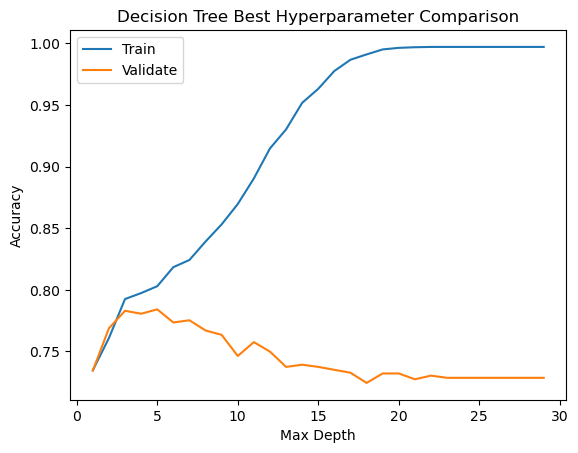

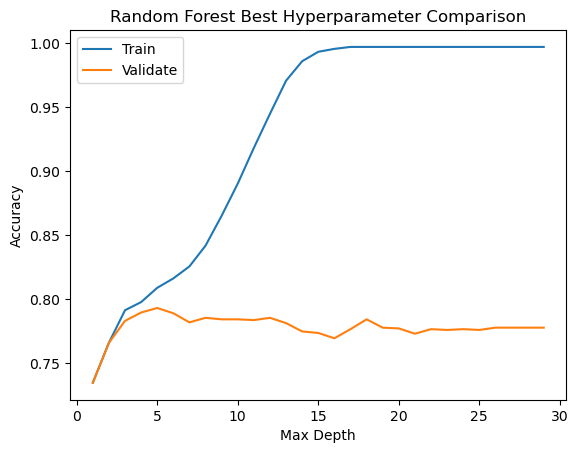

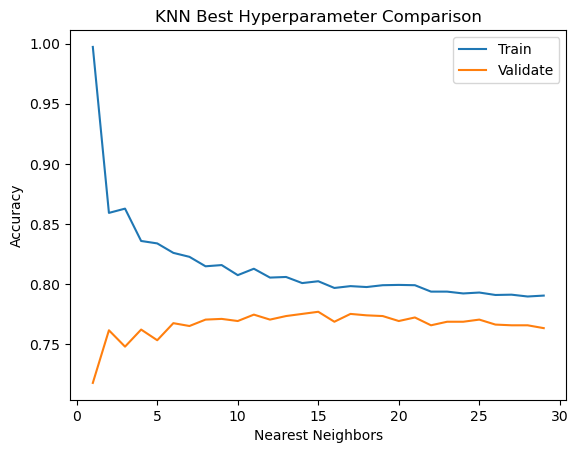

In [11]:
# 3 function calls to bring in graphs designed to find best criteria for modeling
dt_comp(), rf_comp(), knn_comp()
plt.show()

#### For Logistic Regression, we created five models with varying feature sizes to cast a wide net and determined the first Model we created had the best accuracy score

In [10]:
# function from modeling to compare 5 logistic regression models percentages side by side
lr_comp()

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
73.463013%

Model 1 Train Accuracy Score:
80.167385%
Model 1 Validate Accuracy Score:
79.302188%

Model 2 Train Accuracy Score:
79.939133%
Model 2 Validate Accuracy Score:
78.888232%

Model 3 Train Accuracy Score:
79.431905%
Model 3 Validate Accuracy Score:
78.356002%

Model 4 Train Accuracy Score:
78.899315%
Model 4 Validate Accuracy Score:
78.415139%

Model 5 Train Accuracy Score:
78.721785%
Model 5 Validate Accuracy Score:
76.700177%    


___

| Model Type | Decision Tree | Random Forest | K Nearest Neighbor | Decision Tree |
| :-: | :-: | :-: | :-: | :-: |
| Training Accuracy | 80.294192% | 80.243469% | 80.243469% | 80.167385% |
| Validate Accuracy | 80.898876% | 81.431106% | 77.942046% | 79.302188% |

___

### Both our Decision Tree and Random Forest models performed in the 80% range for the training and validation set so we'll run the test set to see which comes out best.

| Model Type | Decision Tree | Random Forest | 
| :-: | :-: | :-: |
| Training Accuracy | 80.294192% | 80.243469% |
| Validate Accuracy | 80.898876% | 81.431106% |
| Test Accuracy | 81.689141% | 81.618169% |

#### So our Decision Tree Model performed the best at almost 82% to our Baseline of about 74%

___

# Conclusion

## Goal Recap:
- Determine key drivers of churn from Telco Dataset.
  - Contract Type being the primary driver, Monthly Charges and Having Internet Service being secondary.
- Determine the most viable ML model and accurately predict churn with it.
  - After going through a few models, we have selected the best one for our data and beat baseline accuracy.

## Key Findings:
- Many of the features we started with appeared to affect customer churn but Contract was the most significant.

## Recommendations:
- Push more customers to yearly contracts

## Next Steps:
- Group Contract feature further to 'yearly', and 'monthly' for further analysis of driver importance
- Perform more feature selection, remove features like 'has_dependents', and 'has_phone_service'